<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/Star_Formation_History/NGC6822_SFH_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 551 (delta 108), reused 113 (delta 59), pack-reused 337
Receiving objects: 100% (551/551), 51.81 MiB | 12.59 MiB/s, done.
Resolving deltas: 100% (248/248), done.
Updating files: 100% (69/69), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.01
Z_name = ''.join(list(str(Z))[2:])
X_fluctuation_limit = 2.6

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/final_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [6]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

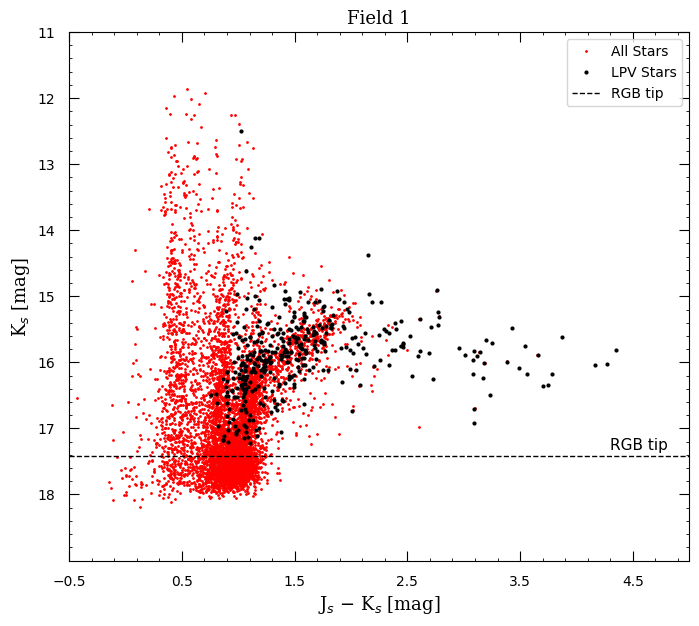

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'r.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'k.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-zqgmrpu4
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-zqgmrpu4
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 133cf258c279bd21298433351b0908d8a40038ea
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2576 sha256=f8c94c53314138e76318973602a5997675993257a9fbba5e202b8243d426f3dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-judufeiy/wheels/3a/dd/30/3b5d25852c9372703f4d564c038363f5a68f610031b9fd3335
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrom_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Wed Jan 25 23:38:44 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [13]:
AstroDC.Stev_Isochrom_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 11:57:57 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.6,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.6,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.6,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.6,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.6,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20655,0.01,-0.17553,10.1,0.935630,2.458368,0.683,3.335,3.5055,-0.089,7,...,0.011200,-3.568,4.274,3.075,1.495,-0.545,-2.723,-5.182,-6.218,-6.586
20656,0.01,-0.17553,10.1,0.935630,2.458368,0.672,3.361,3.5040,-0.127,7,...,0.011200,-3.632,4.263,3.111,1.543,-0.539,-2.744,-5.251,-6.287,-6.660
20657,0.01,-0.17553,10.1,0.935630,2.458368,0.664,3.368,3.5058,-0.133,7,...,0.011200,-3.650,4.237,3.019,1.423,-0.624,-2.806,-5.263,-6.298,-6.668
20658,0.01,-0.17553,10.1,0.935630,2.458368,0.661,3.369,3.5098,-0.120,7,...,0.011200,-3.653,4.187,2.825,1.174,-0.787,-2.913,-5.253,-6.284,-6.650


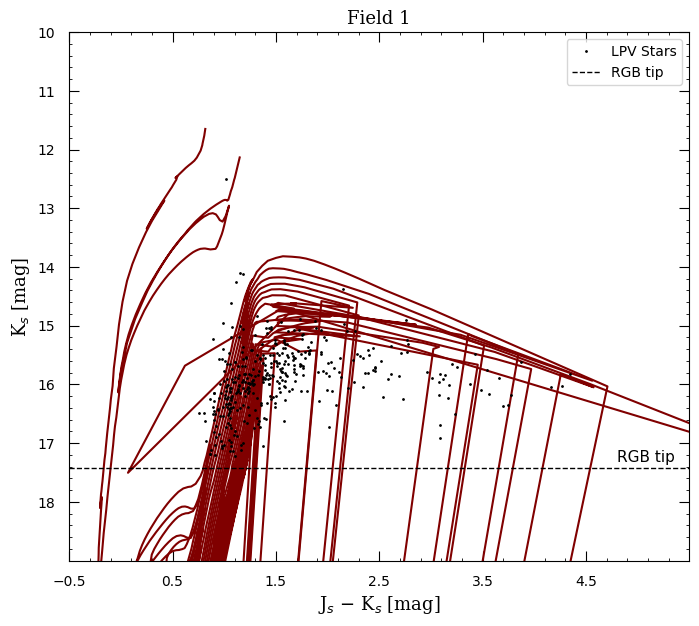

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#All stars
plt.plot(X, Y,'k.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.60,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.60,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.60,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.60,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.60,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,0.01,-0.17553,10.05,0.966879,2.465708,0.683,3.084,3.5384,0.294,8,...,0.009833,-2.939,4.190,2.148,0.296,-1.121,-2.716,-4.444,-5.450,-5.757
21224,0.01,-0.17553,10.05,0.966880,2.465708,0.657,3.429,3.4896,-0.263,8,...,0.009833,-3.802,4.341,3.595,2.138,-0.210,-2.552,-5.468,-6.510,-6.904
21225,0.01,-0.17553,10.05,0.966881,2.465709,0.648,3.101,3.5382,0.254,8,...,0.009833,-2.981,4.188,2.131,0.269,-1.155,-2.755,-4.486,-5.491,-5.801
21226,0.01,-0.17553,10.05,0.966882,2.465709,0.621,3.444,3.4896,-0.302,8,...,0.009833,-3.840,4.365,3.608,2.139,-0.226,-2.574,-5.502,-6.545,-6.944


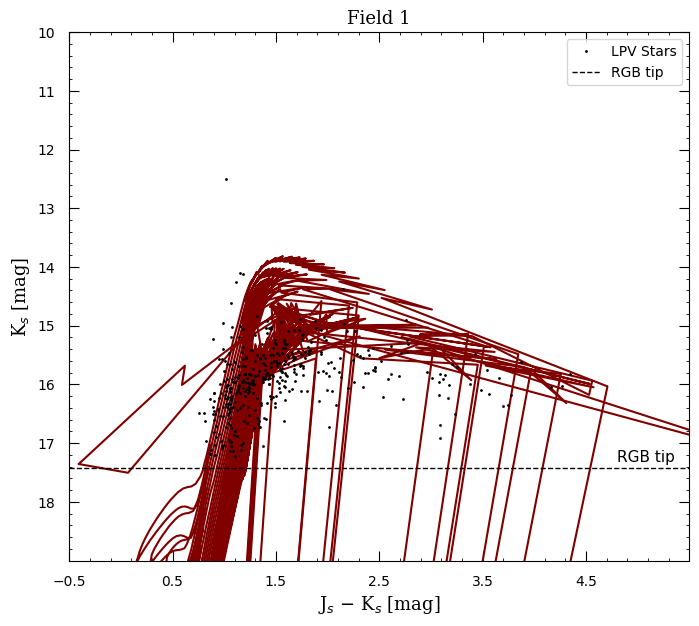

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')


#All stars
plt.plot(X, Y,'k.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [18]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [19]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = ( J_min - Aj )  -  ( K_min - Ak )

X_fluctuation_limit = X_fluctuation_limit

Slope : Carbon

In [20]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = (df_Correction_C['Jmag'] - Aj) - (df_Correction_C['Kmag']-Ak)
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [21]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    Slope_C_prime.append( K_diff / J_K_diff )
    Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 : 
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [22]:
df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = (df_Correction_O['Jmag'] - Aj) - (df_Correction_O['Kmag']-Ak)
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [23]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    Slope_O_prime.append( K_diff / J_K_diff )
    Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 : 
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

Slope : Visualization

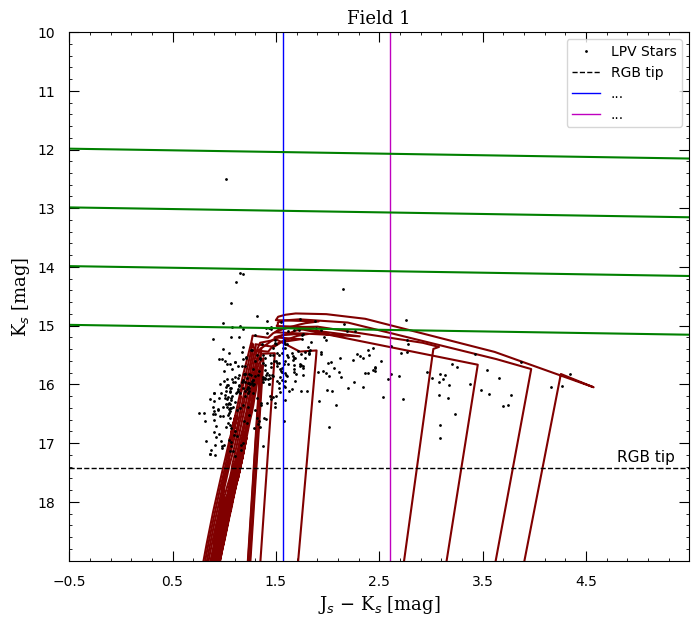

In [24]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#All stars
plt.plot(X, Y,'k.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , linewidth=1 , color='b', linestyle='-', label = '...')
plt.axvline(x = X_fluctuation_limit , linewidth=1 , color='m', linestyle='-', label = '...')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

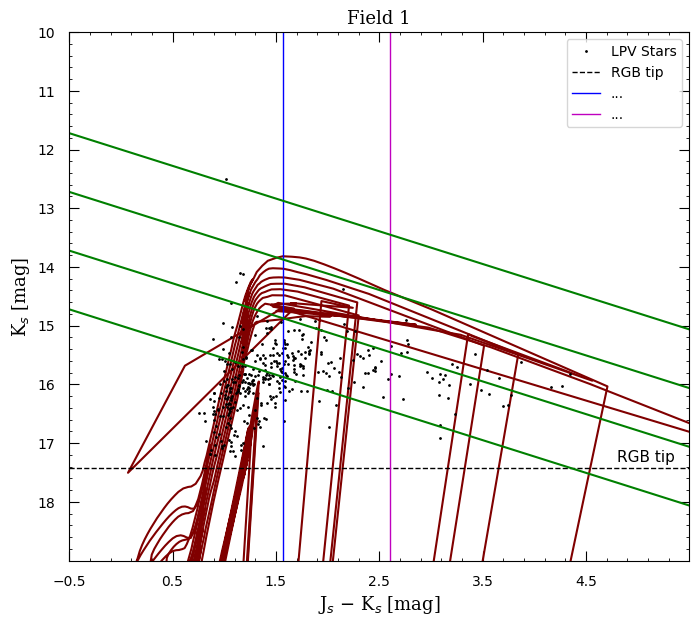

In [25]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#All stars
plt.plot(X, Y,'k.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , linewidth=1 , color='b', linestyle='-', label = '...')
plt.axvline(x = X_fluctuation_limit , linewidth=1 , color='m', linestyle='-', label = '...')

#
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [26]:
df_prime = df[(df['J-Ks']) > X_fluctuation_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [27]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

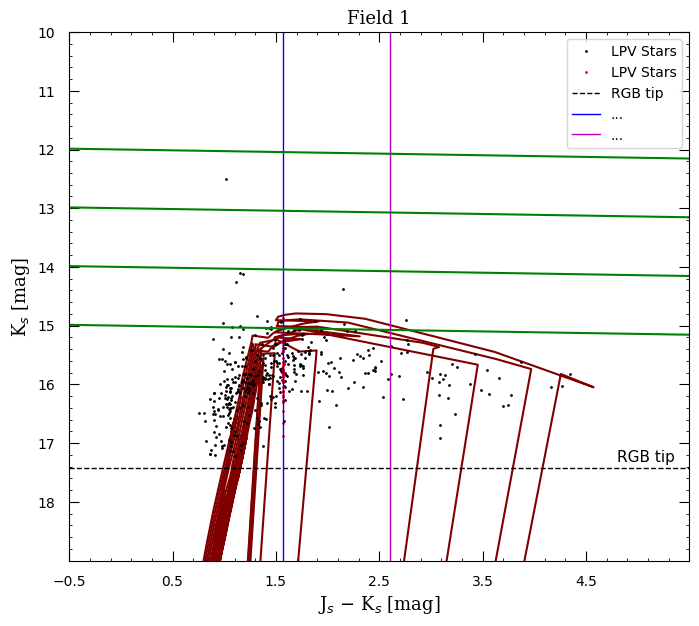

In [28]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#All stars
plt.plot(X, Y,'k.', markersize = '2', label = 'LPV Stars')
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , linewidth=1 , color='b', linestyle='-', label = '...')
plt.axvline(x = X_fluctuation_limit , linewidth=1 , color='m', linestyle='-', label = '...')

#
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [29]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [30]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.01,-0.750,-7.390,NaN,-11.777
1,0.01,-0.402,-3.296,-11.777,-11.396
2,0.01,-0.173,-0.677,-11.396,-11.016
3,0.01,-0.301,-2.189,-11.016,-10.635
4,0.01,-0.217,-1.196,-10.635,-10.254
5,0.01,-0.583,-4.950,-10.254,-9.873
6,0.01,-0.305,-2.210,-9.873,-9.492
7,0.01,-0.309,-2.245,-9.492,-9.112
8,0.01,-0.410,-3.168,-9.112,-8.731
9,0.01,-0.292,-2.137,-8.731,-8.350


In [31]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [32]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [33]:
print(f'a: {a}   b: {b}')

a: -0.249   b: -1.776


$Log(M/M_s) = a \times K_s + b$

In [34]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [35]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

8
C Star --> 8
12
C Star --> 12
18
C Star --> 18
20
O Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
O Star --> 24
27
O Star --> 27
28
C Star --> 28
33
C Star --> 33
41
O Star --> 41
51
O Star --> 51
54
C Star --> 54
57
O Star --> 57
61
C Star --> 61
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
O Star --> 72
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
76
C Star --> 76
77
O Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
199
C Star --> 199


In [36]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


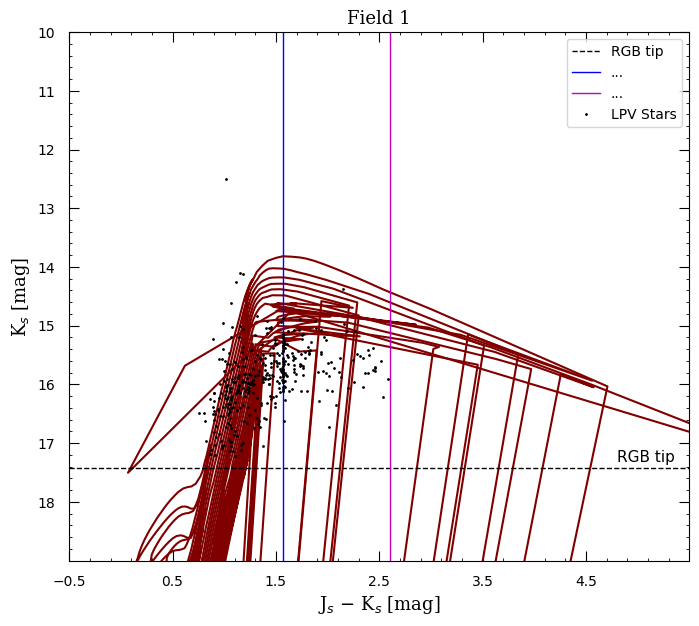

In [37]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , linewidth=1 , color='b', linestyle='-', label = '...')
plt.axvline(x = X_fluctuation_limit , linewidth=1 , color='m', linestyle='-', label = '...')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'k.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [38]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [39]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [40]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
168,0.01,-0.750,-7.390,NaN,-11.777
169,0.01,-0.402,-3.296,-11.777,-11.396
170,0.01,-0.173,-0.677,-11.396,-11.016
171,0.01,-0.301,-2.189,-11.016,-10.635
172,0.01,-0.217,-1.196,-10.635,-10.254
173,0.01,-0.583,-4.950,-10.254,-9.873
174,0.01,-0.305,-2.210,-9.873,-9.492
175,0.01,-0.309,-2.245,-9.492,-9.112
176,0.01,-0.410,-3.168,-9.112,-8.731
177,0.01,-0.292,-2.137,-8.731,-8.350


In [41]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [42]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.249   b: -1.776


In [43]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [44]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms
Mid,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474
...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883


(array([ 54., 171., 102.,  46.,   4.,   2.,   2.,   0.,   0.,   1.]),
 array([-0.136152 , -0.0118418,  0.1124684,  0.2367786,  0.3610888,
         0.485399 ,  0.6097092,  0.7340194,  0.8583296,  0.9826398,
         1.10695  ]),
 <a list of 10 Patch objects>)

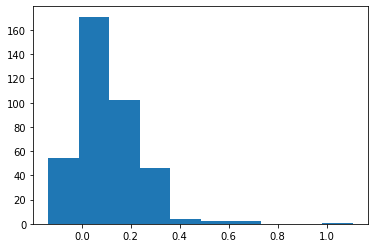

In [45]:
plt.hist(df_final['Log(M/Ms)'])

(array([349.,  28.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.73088323,  1.93702893,  3.14317462,  4.34932032,  5.55546601,
         6.76161171,  7.9677574 ,  9.1739031 , 10.38004879, 11.58619449,
        12.79234018]),
 <a list of 10 Patch objects>)

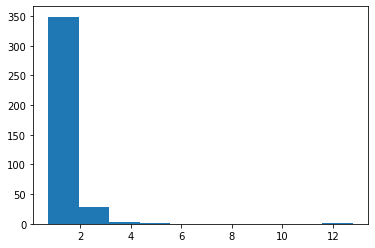

In [46]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [47]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [48]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
16,0.01,-3.256,9.993,NaN,0.179
17,0.01,-2.482,9.852,0.179,0.403
18,0.01,-2.865,10.007,0.403,0.626
19,0.01,-2.272,9.635,0.626,0.850
20,0.01,-1.852,9.278,0.850,1.073
21,0.01,-1.531,8.740,1.073,1.297
22,0.01,-0.955,8.227,1.297,1.520
23,0.01,-0.819,8.020,1.520,NaN


In [49]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [50]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.482   b: 9.852


In [51]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.021

In [52]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [53]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t
Mid,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221,9.857941,7.210097e+09
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276,9.863020,7.294919e+09
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055,9.898576,7.917280e+09
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429,9.873179,7.467568e+09
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474,10.116337,1.307186e+10
...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102,10.306592,2.025778e+10
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10


(array([  1.,   0.,   0.,   3.,   2.,  16.,  84., 106., 129.,  41.]),
 array([ 7.04525955,  7.38436469,  7.72346982,  8.06257496,  8.40168009,
         8.74078523,  9.07989037,  9.4189955 ,  9.75810064, 10.09720578,
        10.43631091]),
 <a list of 10 Patch objects>)

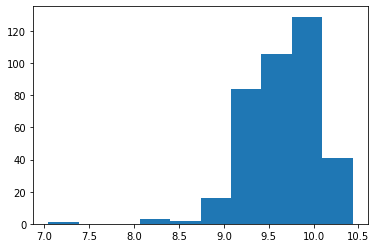

In [54]:
plt.hist(df_final['Log(t)'])

(array([109.,  90.,  96.,  35.,  18.,  10.,   4.,   8.,   7.,   5.]),
 array([1.10983790e+07, 2.74092070e+09, 5.47074303e+09, 8.20056535e+09,
        1.09303877e+10, 1.36602100e+10, 1.63900323e+10, 1.91198546e+10,
        2.18496770e+10, 2.45794993e+10, 2.73093216e+10]),
 <a list of 10 Patch objects>)

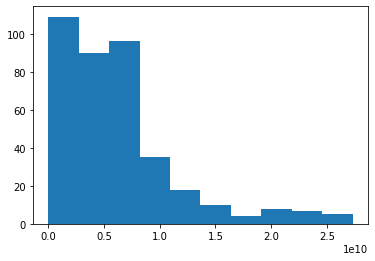

In [55]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [56]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [57]:
Mass_Pulsation

,Z,I,a,b,c,D
48,0.01,1,3.056,1.062,0.209,-8.225
49,0.01,2,0.697,0.711,0.095,0.000
50,0.01,3,6.275,1.444,0.333,0.000
51,0.01,4,5.593,0.385,0.598,0.000


In [58]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D 

In [59]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 0.697   b: 0.711  c: 0.095  D: -8.225


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [60]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)
  
  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [61]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221,9.857941,7.210097e+09,5.653919,450732.759386
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276,9.863020,7.294919e+09,5.646938,443545.198419
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055,9.898576,7.917280e+09,5.597580,395895.282347
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429,9.873179,7.467568e+09,5.632921,429458.406004
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474,10.116337,1.307186e+10,5.283421,192053.151238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102,10.306592,2.025778e+10,5.007781,101807.693227
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10,4.828283,67341.607018


(array([15., 11., 15., 23., 37., 54., 63., 39., 43., 82.]),
 array([4.82828348, 4.98184011, 5.13539674, 5.28895337, 5.44251001,
        5.59606664, 5.74962327, 5.9031799 , 6.05673653, 6.21029317,
        6.3638498 ]),
 <a list of 10 Patch objects>)

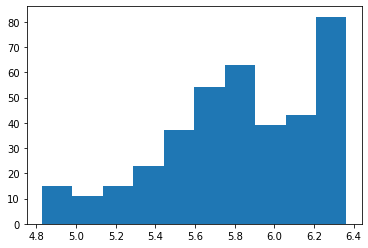

In [62]:
plt.hist(df_final['Log(dt)'])

(array([68., 75., 65., 31., 22., 23., 16., 22., 18., 42.]),
 array([  67341.60701799,  291733.97623144,  516126.34544489,
         740518.71465834,  964911.0838718 , 1189303.45308525,
        1413695.8222987 , 1638088.19151215, 1862480.5607256 ,
        2086872.92993905, 2311265.2991525 ]),
 <a list of 10 Patch objects>)

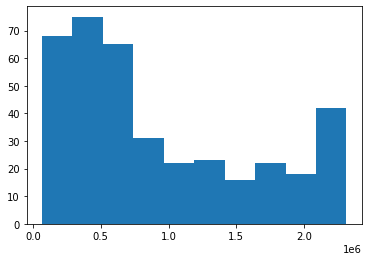

In [63]:
plt.hist(df_final['dt'])

#Star Formation History

In [64]:
df_final = df_final.sort_values(by='t', ascending=False)
df_final = df_final.reset_index()

In [65]:
df_final

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10,4.828283,67341.607018
1,150,89.99,296.204498,-14.674287,18.120,17.210,C,0.910,-0.134160,0.734243,10.429825,2.690450e+10,4.837007,68707.920751
2,175,89.99,295.776978,-15.241439,18.040,17.180,C,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348
3,191,89.99,296.333038,-14.770712,18.040,17.180,C,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348
4,379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,83,30268.00,296.258910,-14.887960,16.530,14.380,LPV,2.150,0.550700,3.553857,8.429244,2.686857e+08,5.436713,273346.436204
378,285,89.99,296.365631,-14.891643,15.362,14.248,C,1.114,0.598418,3.966596,8.292532,1.961248e+08,5.195033,156687.045301
379,42,10198.00,296.250880,-14.767860,15.300,14.120,O,1.180,0.637970,4.344802,8.185532,1.532965e+08,5.090837,123264.346881
380,44,10091.00,296.267020,-14.763110,15.260,14.110,O,1.150,0.641060,4.375826,8.178512,1.508383e+08,5.086548,122052.873694


In [66]:
df_final['alpha'] = np.nan
for i in df_final.index:
  if df_final.loc[i,'M/Ms'] < 0.08 :
     df_final.loc[i,'alpha'] = 0.3
  elif df_final.loc[i,'M/Ms'] >= 0.5 :
     df_final.loc[i,'alpha'] = 2.3
  else :
     df_final.loc[i,'alpha'] = 1.3  

(array([  0.,   0.,   0.,   0.,   0., 382.,   0.,   0.,   0.,   0.]),
 array([1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8]),
 <a list of 10 Patch objects>)

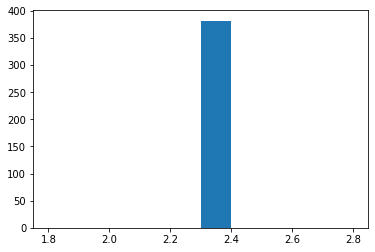

In [67]:
plt.hist(df_final['alpha'])

In [68]:
bins_number = 20
bins_with_more_stars = 2
bins_pop = ([19]*(bins_number-bins_with_more_stars)) + ([20]*bins_with_more_stars)

In [69]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

for i in bins_pop :

  selected_df = df_final[lower_index:lower_index+i]

  lower_limit = selected_df.iloc[0]['M/Ms']
  upper_limit = selected_df.iloc[-1]['M/Ms']
  alpha = selected_df.iloc[0]['alpha']
  lower_log_t_ = selected_df.iloc[0]['Log(t)']
  upper_log_t_ = selected_df.iloc[-1]['Log(t)']
  


  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha) , lower_limit, upper_limit)
  
  XI_ = p1 * p2 * (1/p3)
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((lower_log_t_ + upper_log_t_)/2)
  log_t_err.append((upper_log_t_ - lower_log_t_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

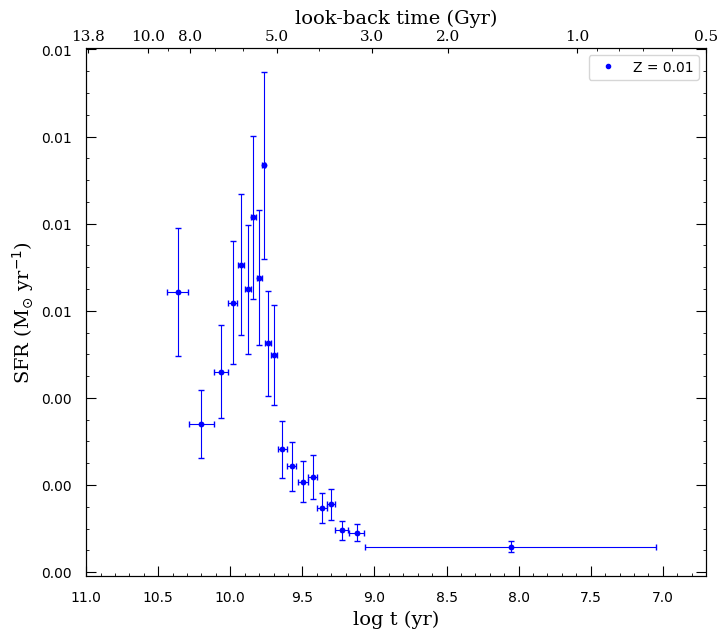

In [70]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

# plt.xlim(11,6.5)

plt.xlim(11,6.7)

plt.plot( log_t, XI, '.', color = 'b', label = 'Z = ' + str(Z))
plt.errorbar(log_t, XI, XI_err, log_t_err, fmt='.', color='b', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
# plt.savefig('./SFR-F1-1.jpeg', bbox_inches='tight', dpi = 400)

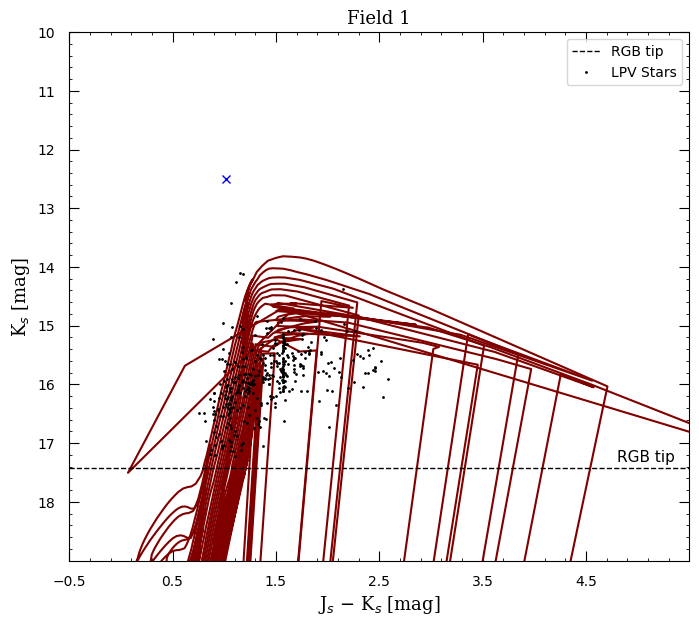

In [71]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'maroon')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

# #Correction lines
# Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
# J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
# K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
# X_min = ( J_min - Aj )  -  ( K_min - Ak )
# plt.axvline(x = X_peak_limit , linewidth=1 , color='b', linestyle='-', label = '...')
# plt.axvline(x = X_fluctuation_limit , linewidth=1 , color='m', linestyle='-', label = '...')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'k.', markersize = '2', label = 'LPV Stars')
plt.plot(df_final['J-Ks'][-1:],df_final['Ks'][-1:],'bx')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [72]:
df_final = df_final[:-1]

In [73]:
bins_number = 20
bins_with_more_stars = 1
bins_pop = ([19]*(bins_number-bins_with_more_stars)) + ([20]*bins_with_more_stars)

In [74]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

for i in bins_pop :

  selected_df = df_final[lower_index:lower_index+i]

  lower_limit = selected_df.iloc[0]['M/Ms']
  upper_limit = selected_df.iloc[-1]['M/Ms']
  alpha = selected_df.iloc[0]['alpha']
  lower_log_t_ = selected_df.iloc[0]['Log(t)']
  upper_log_t_ = selected_df.iloc[-1]['Log(t)']
  


  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha) , lower_limit, upper_limit)
  
  XI_ = p1 * p2 * (1/p3)
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((lower_log_t_ + upper_log_t_)/2)
  log_t_err.append((upper_log_t_ - lower_log_t_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

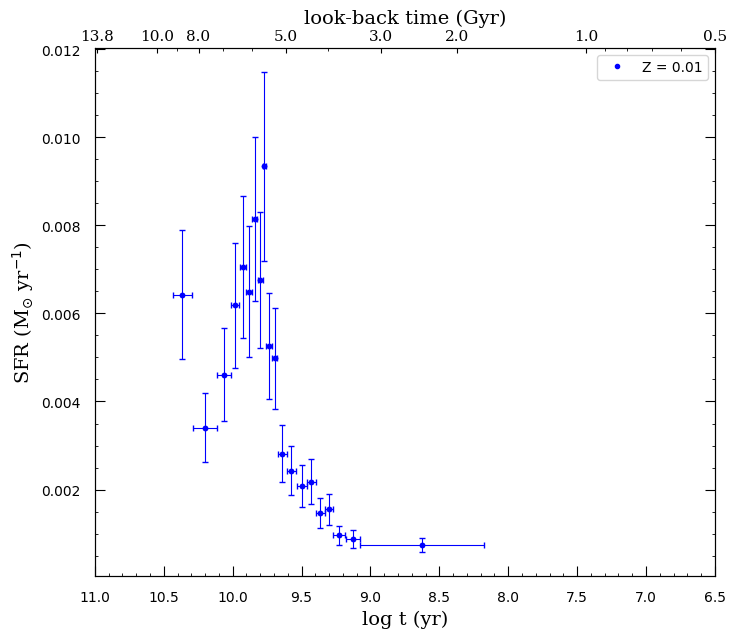

In [75]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(11,6.5)


plt.plot( log_t, XI, '.', color = 'b', label = 'Z = ' + str(Z))
plt.errorbar(log_t, XI, XI_err, log_t_err, fmt='.', color='b', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)


# plt.savefig('./SFR-F1-1.jpeg', bbox_inches='tight', dpi = 400)